>**Note:** This notebook was used on Kaggle to get some ideas about the data. The main goal of the notebook is to create some sample data which can be used for experimentation. The resulting data can be found in the `sample` directory.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython import display
from matplotlib import animation
import json
import random

# Visualization

In [2]:
BASE_DIR = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/train'
N_TIMES_BEFORE = 4

In [3]:
_T11_BOUNDS = (243, 303)
_CLOUD_TOP_TDIFF_BOUNDS = (-4, 5)
_TDIFF_BOUNDS = (-4, 2)

def normalize_range(data, bounds):
    """Maps data to the range [0, 1]."""
    return (data - bounds[0]) / (bounds[1] - bounds[0])

In [4]:
def visualize(record_id, show_human_masks = False):
    with open(os.path.join(BASE_DIR, record_id, 'band_11.npy'), 'rb') as f:
        band11 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_14.npy'), 'rb') as f:
        band14 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_15.npy'), 'rb') as f:
        band15 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'human_pixel_masks.npy'), 'rb') as f:
        human_pixel_mask = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'human_individual_masks.npy'), 'rb') as f:
        human_individual_mask = np.load(f)
        
    r = normalize_range(band15 - band14, _TDIFF_BOUNDS)
    g = normalize_range(band14 - band11, _CLOUD_TOP_TDIFF_BOUNDS)
    b = normalize_range(band14, _T11_BOUNDS)
    false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1)
    
    img = false_color[..., N_TIMES_BEFORE]

    plt.figure(figsize=(18, 6))
    ax = plt.subplot(1, 3, 1)
    ax.imshow(img)
    ax.set_title('False color image')

    ax = plt.subplot(1, 3, 2)
    ax.imshow(human_pixel_mask, interpolation='none')
    ax.set_title('Ground truth contrail mask')

    ax = plt.subplot(1, 3, 3)
    ax.imshow(img)
    ax.imshow(human_pixel_mask, cmap='Reds', alpha=.4, interpolation='none')
    ax.set_title('Contrail mask on false color image')
    plt.show()
    
    if show_human_masks:
        n = human_individual_mask.shape[-1]
        plt.figure(figsize=(16, 4))
        for i in range(n):
            plt.subplot(1, n, i+1)
            plt.imshow(human_individual_mask[..., i], interpolation='none')
            

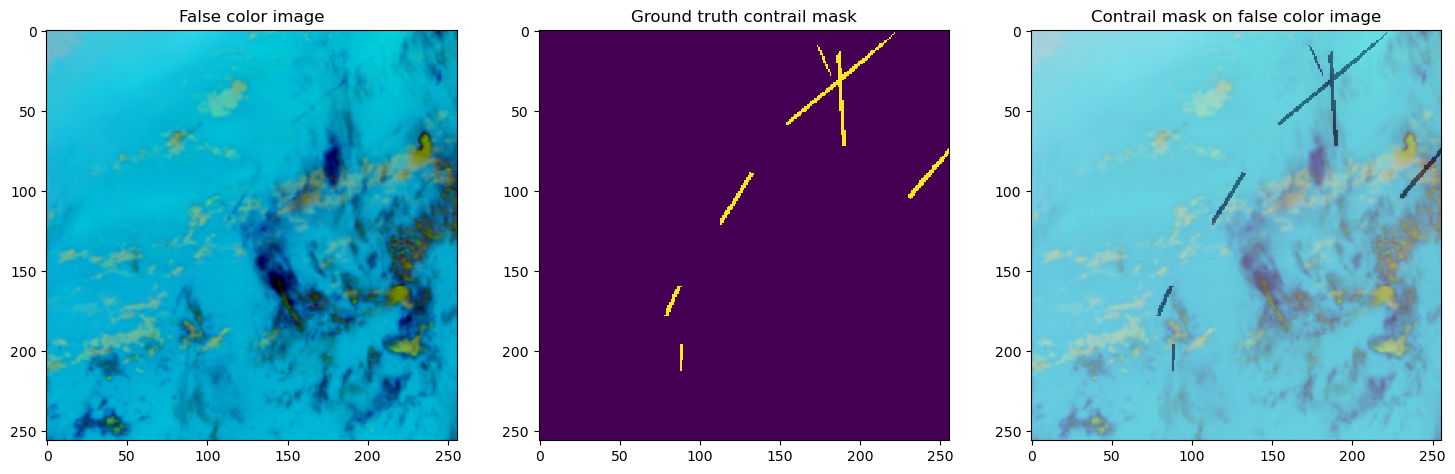

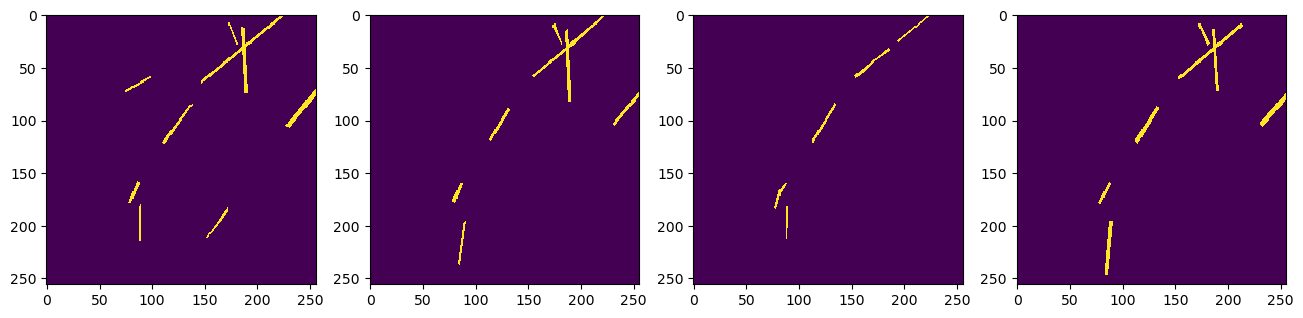

In [5]:
visualize("1003490578134896390", True)

In [6]:
def load_one_record(record_id):
    with open(os.path.join(BASE_DIR, record_id, 'band_11.npy'), 'rb') as f:
        band11 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_14.npy'), 'rb') as f:
        band14 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_15.npy'), 'rb') as f:
        band15 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'human_pixel_masks.npy'), 'rb') as f:
        human_pixel_mask = np.load(f)
        
    r = normalize_range(band15 - band14, _TDIFF_BOUNDS)
    g = normalize_range(band14 - band11, _CLOUD_TOP_TDIFF_BOUNDS)
    b = normalize_range(band14, _T11_BOUNDS)
    false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1)
    
    img = false_color[..., N_TIMES_BEFORE]
    
    return img, human_pixel_mask

# Metadata

In [7]:
train_metadata_path = "/kaggle/input/google-research-identify-contrails-reduce-global-warming/train_metadata.json"
with open(train_metadata_path, "r") as f:
    train_metadata = json.load(f)

In [8]:
train_metadata[0]

{'record_id': '3283699311323360356',
 'projection_wkt': 'PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-51],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]',
 'row_min': 1686563.5,
 'row_size': -1960.975830078125,
 'col_min': 371650.9375,
 'col_size': 1947.1307373046875,
 'timestamp': 1571008800.0}

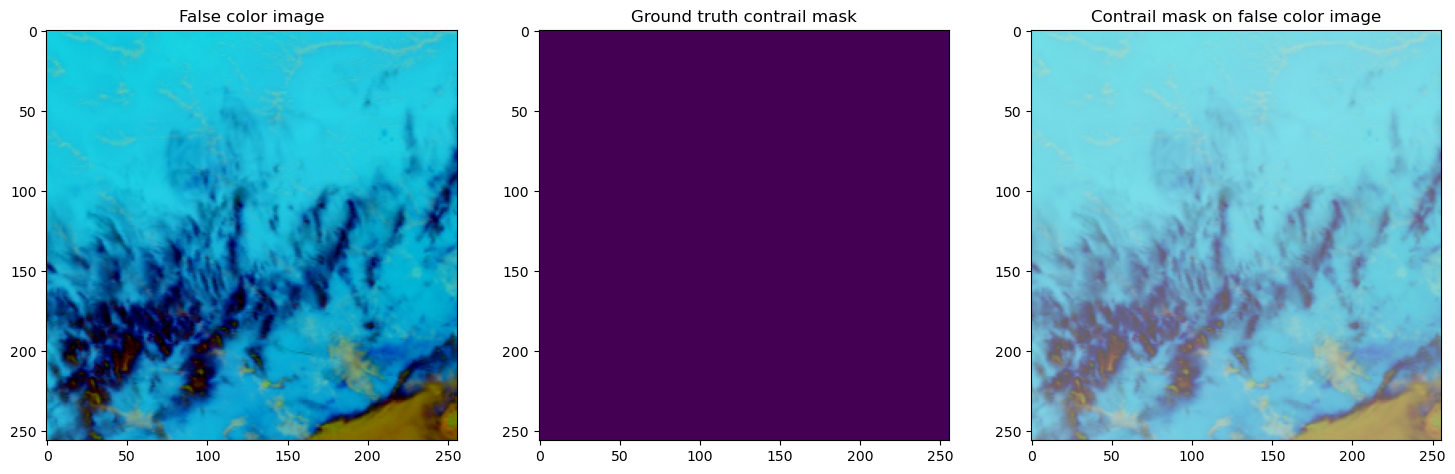

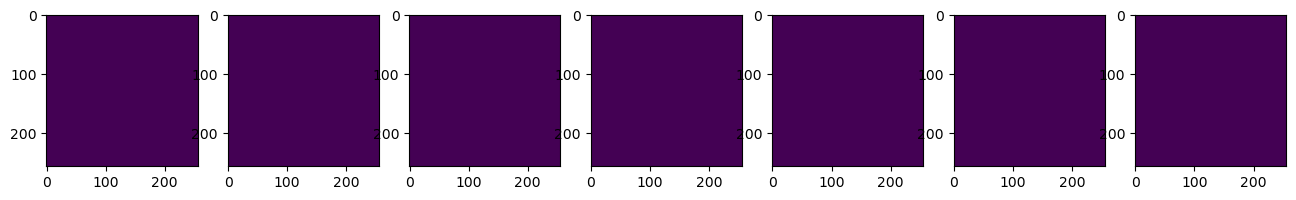

In [9]:
visualize(train_metadata[0]["record_id"], True)

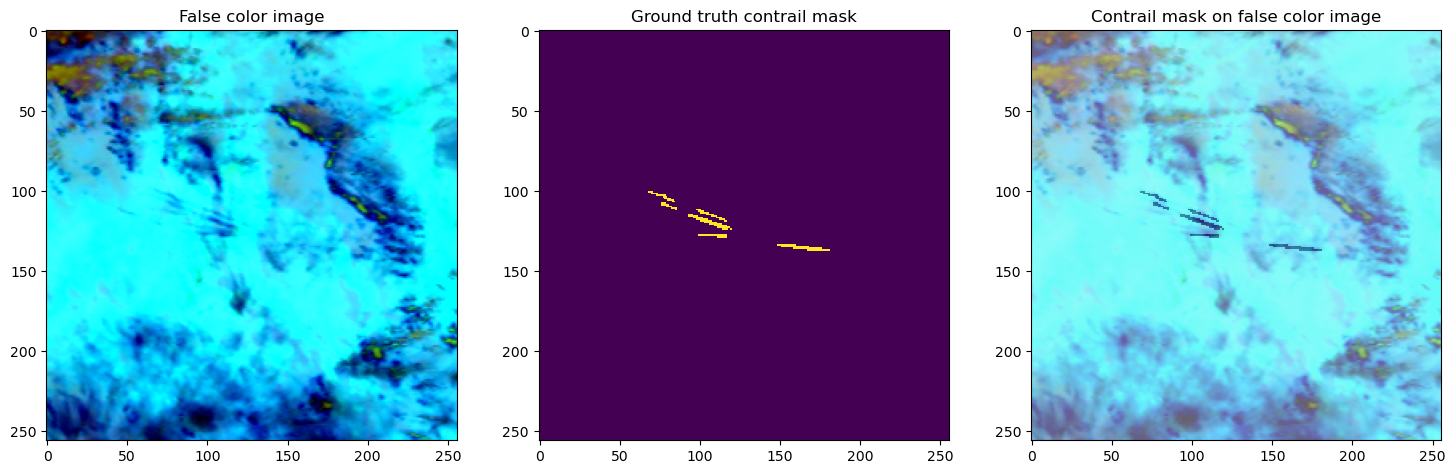

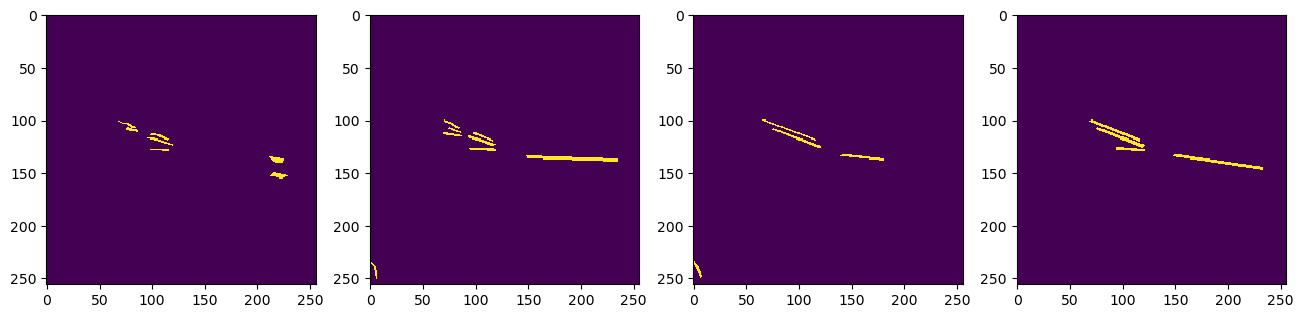

In [10]:
visualize(train_metadata[1000]["record_id"], True)

# Saving Sample

100 with contrails and 100 without it!

In [11]:
NUM_EXAMPLES = 100

In [12]:
all_ids = os.listdir("/kaggle/input/google-research-identify-contrails-reduce-global-warming/train")
len(all_ids)

20529

In [13]:
random.shuffle(all_ids)
all_ids[:5]

['6617442578237895364',
 '7667455634085100535',
 '2373907364620663446',
 '5110685343686579461',
 '5139711961014884383']

In [14]:
positive_examples = []
negative_examples = []
for record_id in all_ids:
    img, label = load_one_record(record_id)
    if (len(np.unique(label)) > 1) and (len(positive_examples)<NUM_EXAMPLES):
        positive_examples.append((img , label))
    elif (len(np.unique(label)) == 1) and (len(negative_examples)<NUM_EXAMPLES):
        negative_examples.append((img , label))
    if (len(positive_examples) == NUM_EXAMPLES) and (len(negative_examples) == NUM_EXAMPLES):
        break

In [15]:
len(positive_examples), len(negative_examples)

(100, 100)

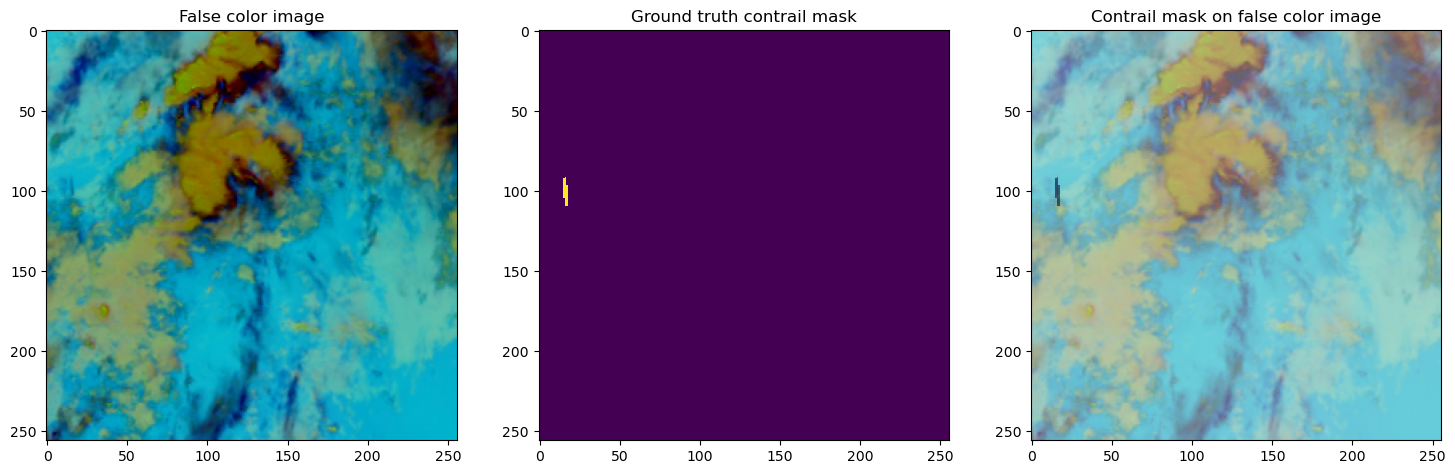

In [16]:
img, label = positive_examples[-1]
plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
ax.imshow(img)
ax.set_title('False color image')

ax = plt.subplot(1, 3, 2)
ax.imshow(label, interpolation='none')
ax.set_title('Ground truth contrail mask')

ax = plt.subplot(1, 3, 3)
ax.imshow(img)
ax.imshow(label, cmap='Reds', alpha=.4, interpolation='none')
ax.set_title('Contrail mask on false color image');

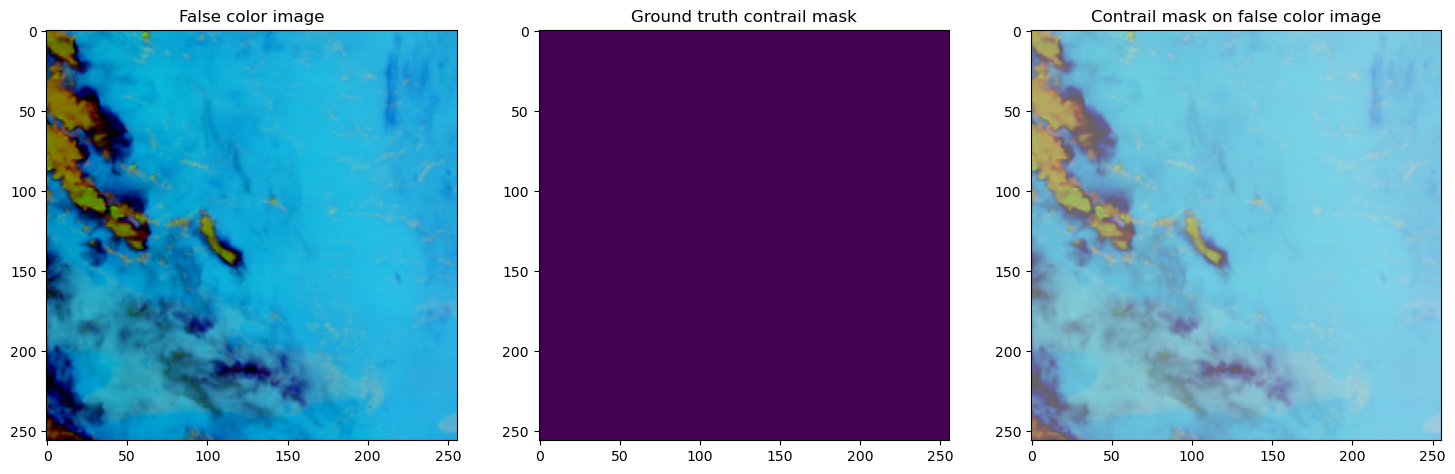

In [17]:
img, label = negative_examples[-1]
plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
ax.imshow(img)
ax.set_title('False color image')

ax = plt.subplot(1, 3, 2)
ax.imshow(label, interpolation='none')
ax.set_title('Ground truth contrail mask')

ax = plt.subplot(1, 3, 3)
ax.imshow(img)
ax.imshow(label, cmap='Reds', alpha=.4, interpolation='none')
ax.set_title('Contrail mask on false color image');

In [18]:
os.mkdir("sample")
os.mkdir("sample/positive")
os.mkdir("sample/negative")

In [19]:
for i, (img, label) in enumerate(positive_examples):
    np.save(f"sample/positive/image_{i+1}.npy", img.astype("float16"))
    np.save(f"sample/positive/label_{i+1}.npy", label.astype("float16"))
    
for i, (img, label) in enumerate(negative_examples):
    np.save(f"sample/negative/image_{i+1}.npy", img.astype("float16"))
    np.save(f"sample/negative/label_{i+1}.npy", label.astype("float16"))

In [20]:
! zip -r data.zip /kaggle/working/sample/ -q

References

- [S1](https://www.kaggle.com/code/lupin11/40min-data-preprocess)
- [S2](https://www.kaggle.com/code/inversion/visualizing-contrails)